# Resume Parser

_Author:_ @AdameBf \\\
_Last edited:_ 2023-01-30

Inspired by [this article on projectpro.io](https://www.projectpro.io/article/artificial-intelligence-project-ideas/461#mcetoc_1fcb5nj0np), the aim is to classify resumes depending on the keywords they feature.

As suggesed in the article, the dataset used is [that of Kaggle](https://www.kaggle.com/gauravduttakiit/resume-dataset).

## 0. Loading steps

### 0.1. Library imports

In [62]:
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 458.9/458.9 kB 8.4 MB/s eta 0:00:007.8 MB/s eta 0:00:01

[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python -m pip install --upgrade pip


In [63]:
!python -m pip install --upgrade pip

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 23.1 MB/s eta 0:00:00 MB/s eta 0:00:01:01
  Attempting uninstall: pip
    Found existing installation: pip 22.2.2
    Uninstalling pip-22.2.2:
      Successfully uninstalled pip-22.2.2


In [64]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

import nltk
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud

### 0.2. Loading of the dataset

In [50]:
resume_data = pd.read_csv(r'data/UpdatedResumeDataSet.csv')

In [51]:
resume_data.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


## 1. Analysing the dataset

### 1.1 Size of the dataset

How much data do we have? (How many rows? For each row, how many columns?)

In [52]:
resume_data.shape

(962, 2)

That's 962 rows, but do we have nulls?

In [53]:
resume_data.isnull().sum()

Category    0
Resume      0
dtype: int64

No sanitisation is therefore required.

The dataset is composed of two columns, namely, the category and the information contained in the resume.

### 1.2. First column: Category

Whilst the second column is basically unstructured data, the first one could be a handy way to group the different resumes together (in other words: we could potentially form classes using this).

Let us check whether the classes are balanced.

In [54]:
# Class balance
print('Number of classes:', resume_data['Category'].nunique())
resume_data['Category'].value_counts()

Number of classes: 25


Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64

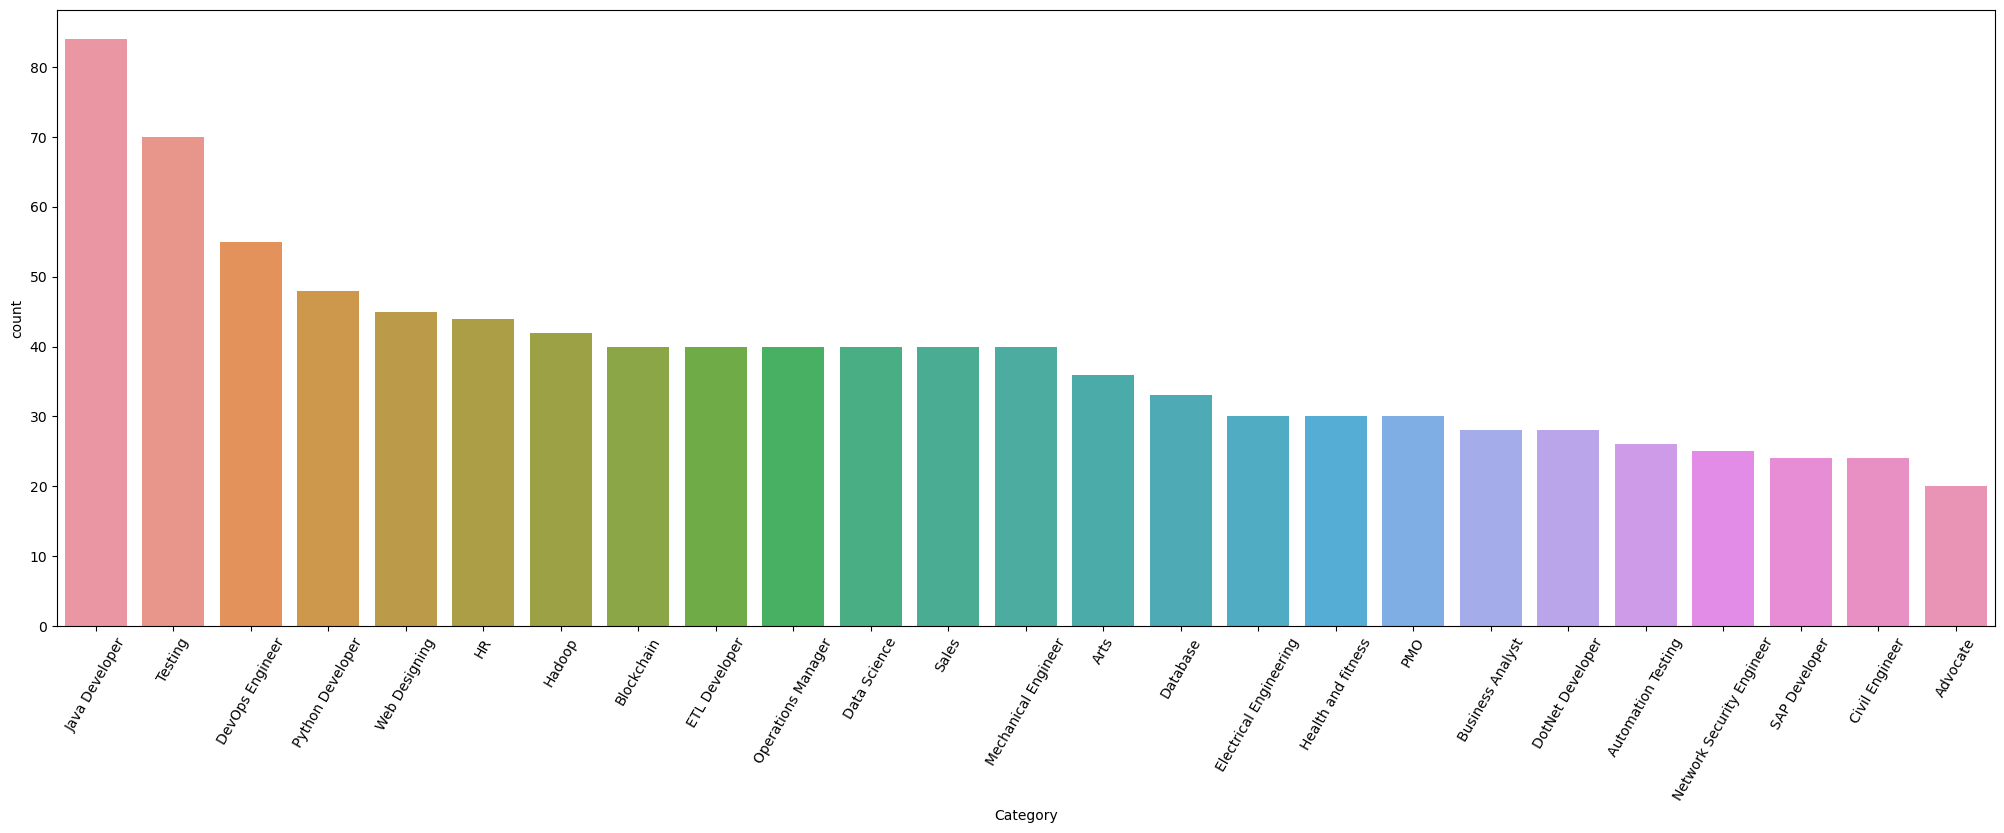

In [55]:
# Class spread visualisation: here's an example of how to do it with matplotlib and seaborn

plt.figure(figsize=(25,8))
plt.xticks(rotation=60)
# count plot on single categorical variable
sns.countplot(x ='Category', data=resume_data, order=resume_data['Category'].value_counts().index)
 
# Show the plot
plt.show()

The classes do seem somewhat unbalanced (ratio of 4 between the most frequent class and the rarest one). Chances are balancing techniques will be needed.

### 1.3. Second column: Resume

Finally, let us have a look at the sort of things we can find in the ``Resume`` column.

In [56]:
resume_data['Resume'][6]

'Skills â\x80¢ Python â\x80¢ Tableau â\x80¢ Data Visualization â\x80¢ R Studio â\x80¢ Machine Learning â\x80¢ Statistics IABAC Certified Data Scientist with versatile experience over 1+ years in managing business, data science consulting and leading innovation projects, bringing business ideas to working real world solutions. Being a strong advocator of augmented era, where human capabilities are enhanced by machines, Fahed is passionate about bringing business concepts in area of machine learning, AI, robotics etc., to real life solutions.Education Details \r\nJanuary 2017 B. Tech Computer Science & Engineering Mohali, Punjab Indo Global College of Engineering\r\nData Science Consultant \r\n\r\nData Science Consultant - Datamites\r\nSkill Details \r\nMACHINE LEARNING- Exprience - 13 months\r\nPYTHON- Exprience - 24 months\r\nSOLUTIONS- Exprience - 24 months\r\nDATA SCIENCE- Exprience - 24 months\r\nDATA VISUALIZATION- Exprience - 24 months\r\nTableau- Exprience - 24 monthsCompany Deta

In [57]:
resume_data['Resume'][217]

"Education Details \r\nJanuary 2018 Bachelor's of Engineering Engineering Mumbai, Maharashtra MGM College of Engineering\r\n Diploma Mechanical Pune, Maharashtra MIT\r\nPresident of Mechanical Engineering Student's Association \r\n\r\nPresident of Mechanical Engineering Student's Association\r\nSkill Details \r\nCompany Details \r\ncompany - Full Throttle\r\ndescription - conducted by IIT\r\nBombay.\r\n\r\nâ\x80¢   Worked as a President of Mechanical Engineering Student's Association [MESA] in\r\nMIT, Pune.\r\ncompany - R.C Car Race of STEPCONE\r\ndescription - paper & project contest and exhibition conducted by GMR Instiute of Technology."

In [58]:
resume_data['Resume'][145]

"Technical Skills Web Technologies: Angular JS, HTML5, CSS3, SASS, Bootstrap, Jquery, Javascript. Software: Brackets, Visual Studio, Photoshop, Visual Studio Code Education Details \r\nJanuary 2015 B.E CSE Nagpur, Maharashtra G.H.Raisoni College of Engineering\r\nOctober 2009  Photography Competition Click Nagpur, Maharashtra Maharashtra State Board\r\n    College Magazine OCEAN\r\nWeb Designer \r\n\r\nWeb Designer - Trust Systems and Software\r\nSkill Details \r\nPHOTOSHOP- Exprience - 28 months\r\nBOOTSTRAP- Exprience - 6 months\r\nHTML5- Exprience - 6 months\r\nJAVASCRIPT- Exprience - 6 months\r\nCSS3- Exprience - Less than 1 year months\r\nAngular 4- Exprience - Less than 1 year monthsCompany Details \r\ncompany - Trust Systems and Software\r\ndescription - Projects worked on:\r\n1. TrustBank-CBS\r\nProject Description: TrustBank-CBS is a core banking solution by Trust Systems.\r\nRoles and Responsibility:\r\nâ\x97\x8f Renovated complete UI to make it more modern, user-friendly, ma

This is definitely unstructured, with varying lengths (compare number 217 and number 145, for instance).

We can even have undesirable and irrelevant series of characters in the middle of these long texts. The ``\r\n`` tags as well as certain special characters (see 6) have not be sanitised, and example 145 shows us we can even have... URLs! This makes sense remembering we have 45 Web Design resumes in the dataset, but this is the sort of things that can go unnoticed when not reviewing the dataset manually. Since those will definitely not contain relevant keywords for our study, we will have to strip those, using Regular Expression techniques.

## 2. Pre-processing

To perform one-hot encoding of the 25 job categories of the dataset, it is possible to use ``get_dummies`` from ``pandas``.

In [59]:
pd.concat([resume_data, pd.get_dummies(resume_data['Category'], prefix='cat')])

,Category,Resume,cat_Advocate,cat_Arts,cat_Automation Testing,cat_Blockchain,cat_Business Analyst,cat_Civil Engineer,cat_Data Science,cat_Database,...,cat_Java Developer,cat_Mechanical Engineer,cat_Network Security Engineer,cat_Operations Manager,cat_PMO,cat_Python Developer,cat_SAP Developer,cat_Sales,cat_Testing,cat_Web Designing
0,Data Science,Skills * Programming Languages: Python (pandas...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
957,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
958,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
959,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
960,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


Let us treat the ``Resume`` column now.

As mentioned above, certain characters or expressions need to be stripped away. We will use the ``re`` Regular Expression library to find and strip them.

In [60]:
# Create a new column for sanitised resumes
resume_data['sanitised_resume'] = ''

# Define a function for resume sanitisation
def sanitise(resume_text):
    resume_text = re.sub('http\S+\s*', ' ', resume_text)  # remove URLs
    resume_text = re.sub('RT|cc', ' ', resume_text)  # remove RT and cc
    resume_text = re.sub('#\S+', '', resume_text)  # remove hashtags
    resume_text = re.sub('@\S+', '  ', resume_text)  # remove mentions
    resume_text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resume_text)  # remove punctuations
    resume_text = re.sub(r'[^\x00-\x7f]',r' ', resume_text) 
    resume_text = re.sub('\s+', ' ', resume_text)  # remove extra whitespace
    return resume_text

# Apply the function to the dataset
resume_data['sanitised_resume'] = resume_data['Resume'].apply(lambda x: sanitise(x))
resume_data.head()

,Category,Resume,sanitised_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...


Once the column is sanitised, it is time to visualise its contents in a... more pleasant way than plain text.

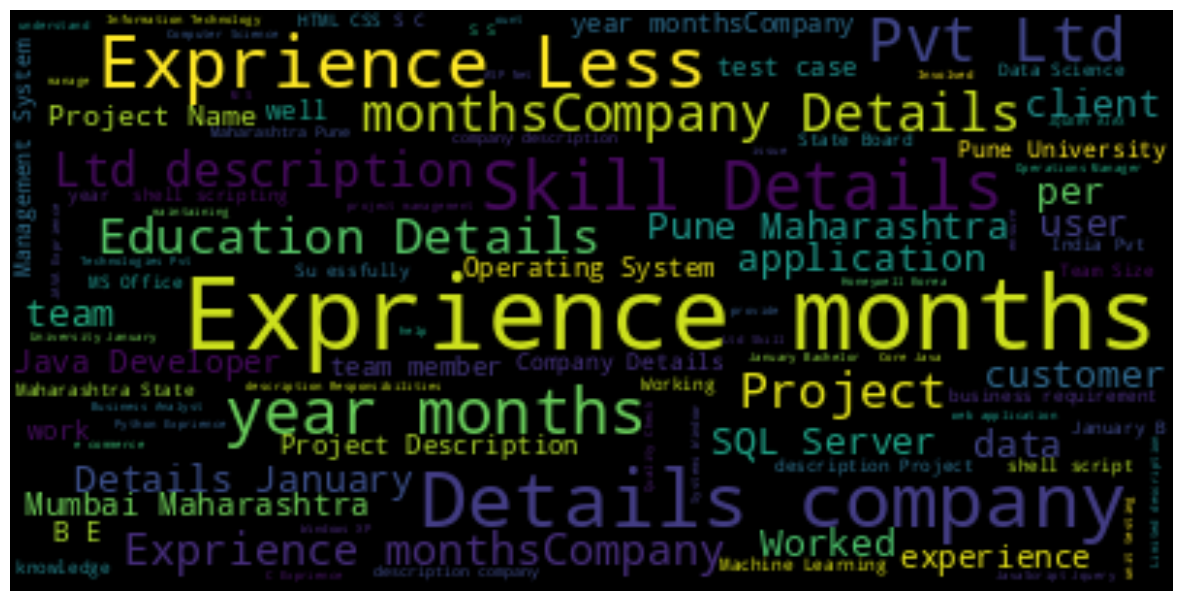

In [73]:
# Let us build a word cloud

# To this end, we will need to look at the words of our sentence
stop_words = set(stopwords.words('english'))
sentences = resume_data['Resume'].values
sanitised_sentences = ''
words = []

for element in sentences:
    sanitised_text = sanitise(element)
    sanitised_sentences += sanitised_text
    words_of_current_element = nltk.word_tokenize(sanitised_text)
    for word in words_of_current_element:
        if word not in (set(stopwords.words('english') + ["''"]).union(set(string.punctuation))):
            words.append(word)

word_cloud = WordCloud().generate(sanitised_sentences)
plt.figure(figsize=(15,15))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()